Paso 1:
Importamos las librearias TensorFlow y Numpy.

In [ ]:
https://www.tensorflow.org/?hl=es-419

In [ ]:
import tensorflow as tf
import numpy as np

Paso 2: Creamos los array de números flotantes, variables de entrada y sus respectivas salidas.

In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

Paso 3: Creamos las capa de red neuronal usando Keras de tipo Densa (tiene conexiones desde cada neurona a todas las neuronas).
En nuestro caso hay una sola neurona por lo que no hay muchas conexiones.

In [ ]:
# units = Cantidad neuronas de la capa de salida
# input_shape = Cantidad de neuronas de entrada
capa = tf.keras.layers.Dense(units=1, input_shape=[1])

# Modelo de tipo Secuencial
modelo = tf.keras.Sequential([capa])

Paso 4: Compilar el modelo.
Se configuran 2 parámetros:
1.- El optimizador: En este caso es el Adam, el cual es un algoritmo que optmiza las salidas del modelo para que al ajustarse vaya mejorando su resultado.

In [ ]:
modelo.compile(
    # Adam recibe un parámetro que corresponde a la tasa de aprendizaje.
    # Al cambiar este valor se puede ir variando la cantidad para que sea
    # adecuada al resultado deseado.(Si es muy pequeño puede tomar más tiempo
    # entrenar al modelo, si es muy grande puede arrojar valores fuera de rango)
    optimizer=tf.keras.optimizers.Adam(0.1),
    # Función de pérdida, error cuadrático medio
    # Una poca cantidad de errores grandes
    # es peor que una gran cantidad de errores pequeños
    loss='mean_squared_error'
)

Paso 5: Entrenamos al modelo usando la función fit().
Le debemos indicar los datos de entrada, los de salida, y cuantas épocas o vueltas queremos que haga para entrenar el modelo, verbose es para que no imprima cada época de datos, es decir, trabaja en modo silencioso.

In [ ]:
print("Comenzando entrenamiento ...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento ...
Modelo entrenado!


Paso 6: Imprimir el resultado de la función de pérdida en cada época lo que nos indica la magnitud del error por época.

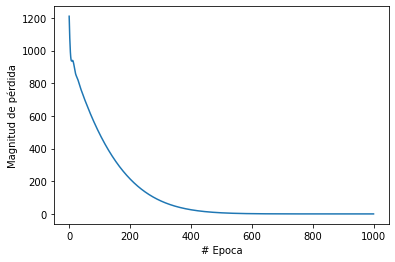

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

Paso 7: Hacer un predicción.

In [ ]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " farenheit!")

Hagamos una predicción!
El resultado es [[211.74405]] farenheit!


In [ ]:
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[1.7981339]], dtype=float32), array([31.930662], dtype=float32)]
